In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [8]:
#loading the dataset both train and test
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

In [9]:
#checking the first five rows of the train dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [10]:
#checking the first five rows of the test dataset
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [11]:
#checking the information of the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
#checking the information of the test dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [13]:
#checking the shape of train dataset
df.shape

(1168, 81)

In [14]:
#checking the shape of test dataset
df1.shape

(292, 80)

In [15]:
#checking the columns of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
#checking the columns of test dataset
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
#checking the data types of dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
#checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
#checking the count/total null values present in the dataset
df.isnull().sum().sum()

5558

In [20]:
df.isnull().values.any()

True

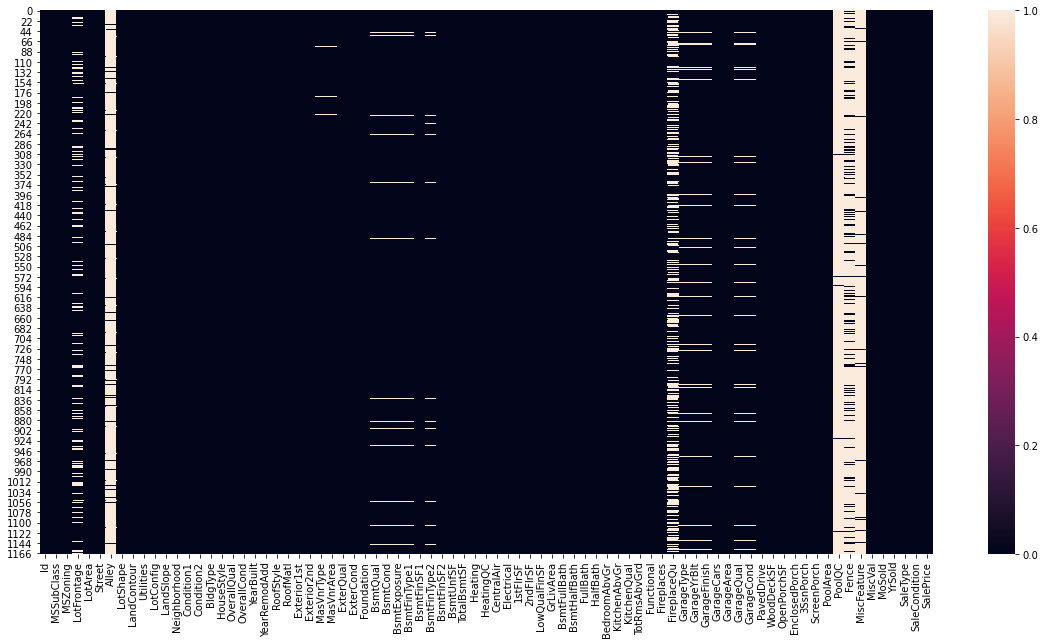

In [21]:
#checking null values by using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [22]:
#imputing the columns with int data types having null values with Simple Imputer and using mean of that particular column
list1=['LotFrontage','GarageYrBlt','MasVnrArea']
imp=SimpleImputer(strategy='mean')
for i in list1:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


In [23]:
#again checking if there are any null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Statistical Summary

In [24]:
#checking the description/summary of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Total entries: 1168
    
Outliers are there in:'MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'SalePrice'
    
Mean is greater than median in(Right skewed):'MasVnrArea','BsmtFinSF1','WoodDeckSF', 'EnclosedPorch','MiscVal' and 'SalePrice'.

    
    

In [25]:
#Checking the correlation between the columns
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.005969,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060503,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.005969,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,...,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.029212,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060503,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,...,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.463626
BsmtFinSF1,0.003868,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


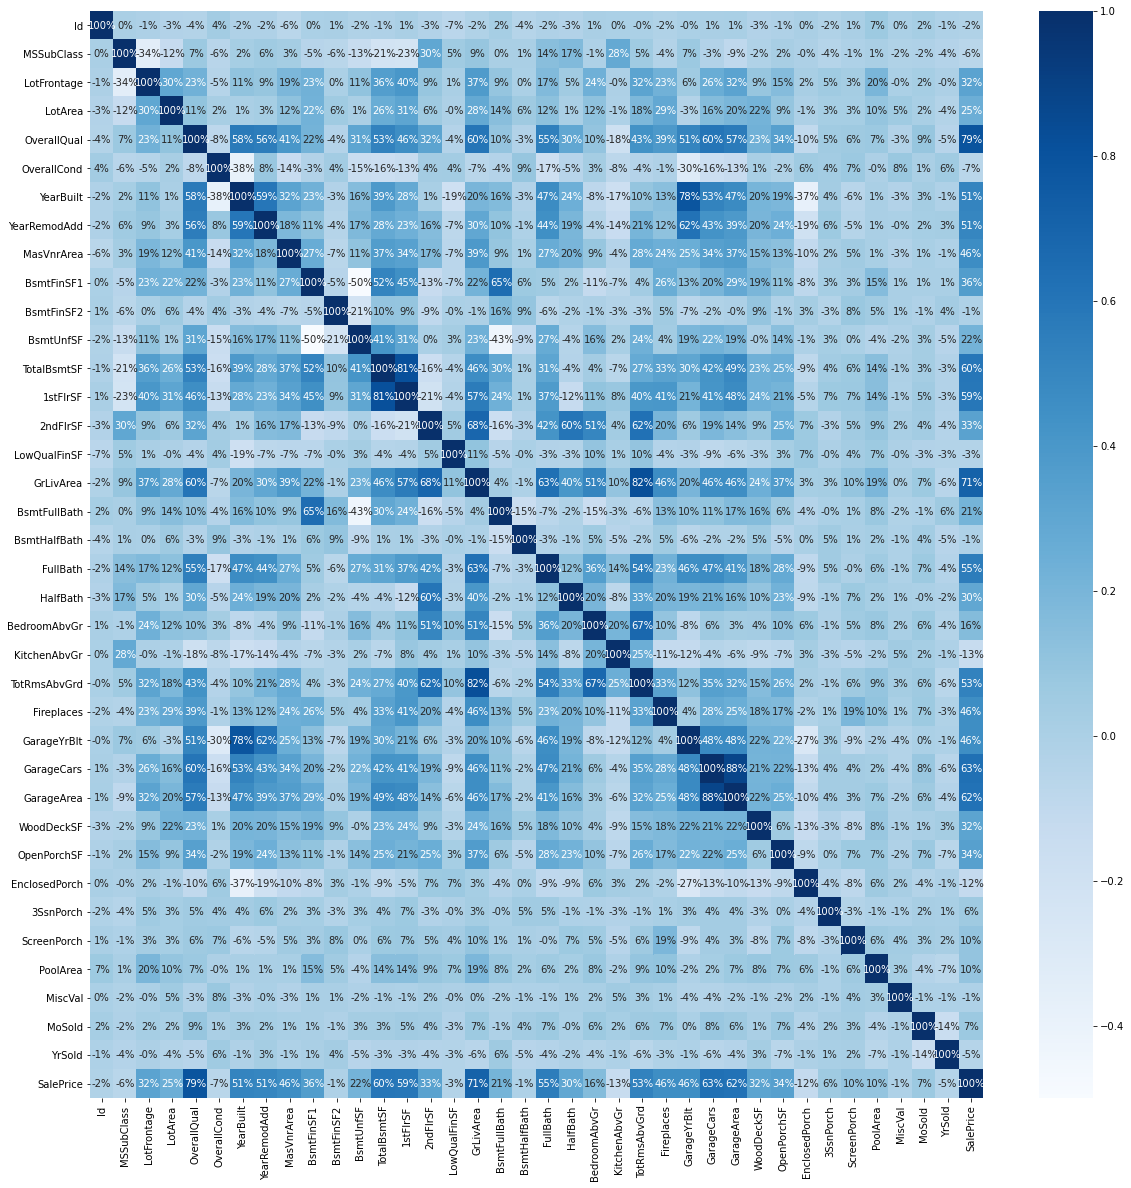

In [26]:
#checking correlation via visualization (heatmap)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

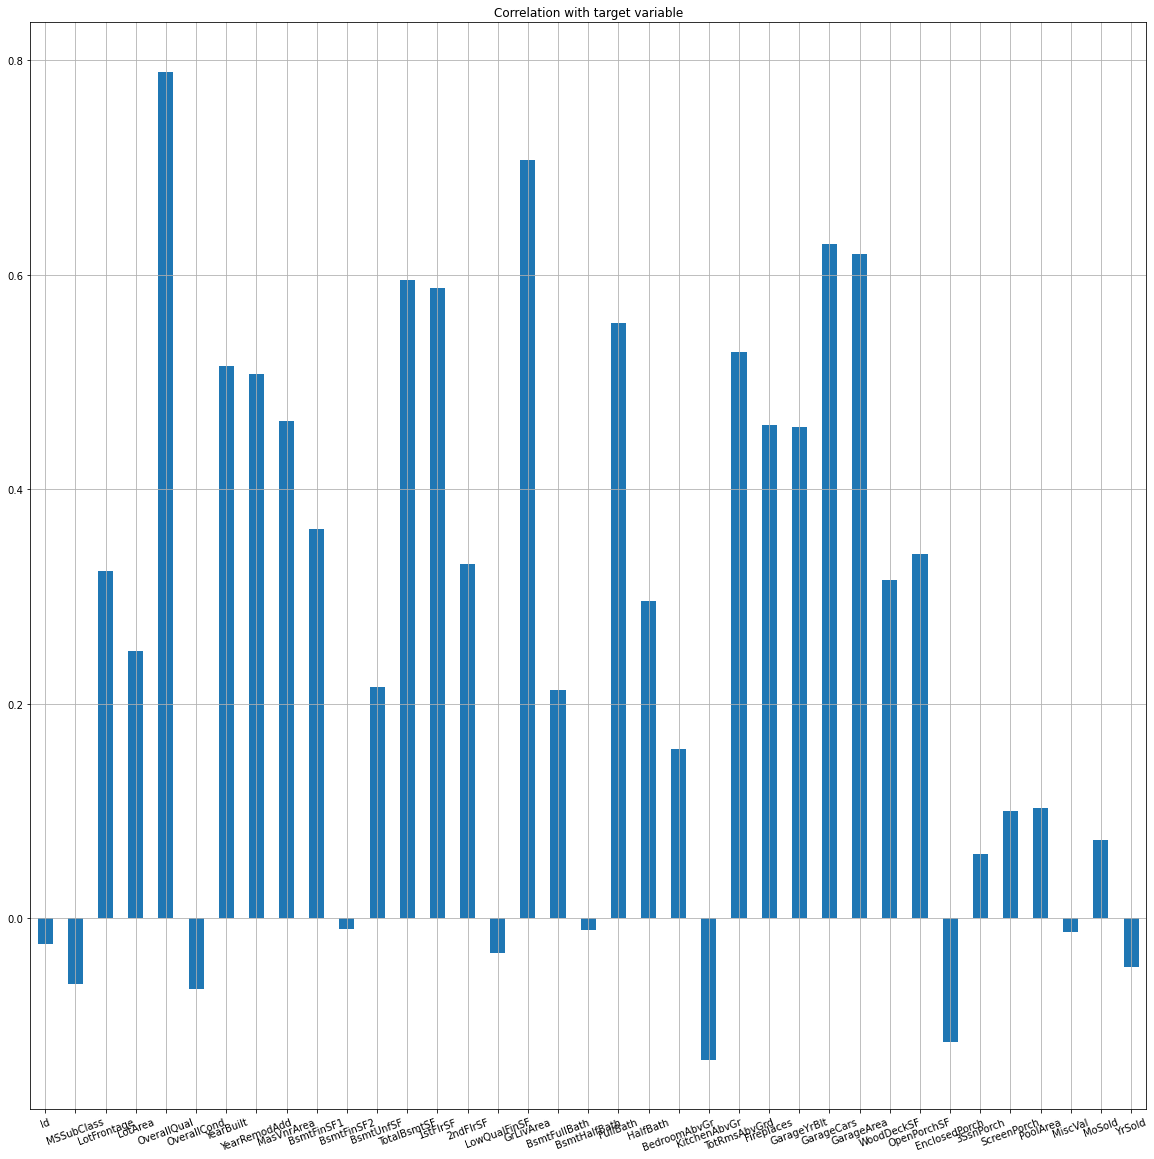

In [27]:
plt.figure(figsize=(20,20))
df.drop('SalePrice',axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

MSSubClass,OverallCond,KitchenAbvGr,EnclosedPorch and Yr Sold are the least/negatively correlated column with target('SalePrice') variable

OverallQual is highly correlated column with target variable followed by GrLivArea and other attributes.

In [28]:
#checking unique values for categorical columns and their value_counts and also the count of nan values if present in that column

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        count_nan_in_df = df[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df))
        print('**********************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Count of NaN: 0
**********************************


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
Count of NaN: 0
**********************************


Alley:[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64
Count of NaN: 1091
**********************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Count of NaN: 0
**********************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
Count of NaN: 0
**********************************


Utilities:['AllPub']
AllPub    1168
Name: Utilities, dtype: int64
Count of NaN: 0
**********************************


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac   

We are having NaN values in:'Alley','PoolQC','MiscFeature','Fence','MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond' but we are dropping 'Alley','PoolQC','MiscFeature','Fence' because it has NaN values more than 50% and we will be imputing rest of the attributes. 

In [29]:
#Dropping the columns 'Alley','PoolQC','MiscFeature','Fence' 
df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,70.98847,9819,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.00000,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.00000,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.00000,8500,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [30]:
#imputing the columns with object data types having nan values with Simple Imputer and using mode of that particular column
list=['MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']
imp=SimpleImputer(strategy='most_frequent')
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


In [31]:
#Again checking the columns with categorical columns after imputing the columns 
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        count_nan_in_df = df[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df))
        print('**********************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Count of NaN: 0
**********************************


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
Count of NaN: 0
**********************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Count of NaN: 0
**********************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
Count of NaN: 0
**********************************


Utilities:['AllPub']
AllPub    1168
Name: Utilities, dtype: int64
Count of NaN: 0
**********************************


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
Count of NaN: 0
**********************************


LandSlope:['

Now all the NaN values have been removed with object datatype.

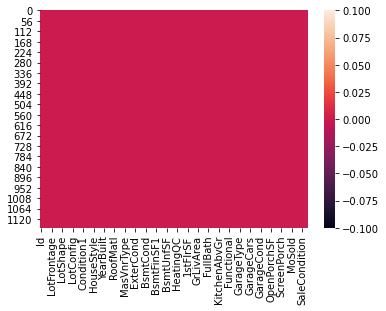

In [32]:
#Finally using heatmap to see if there are any null/nan values left and there are none
sns.heatmap(df.isnull())

It's again verified that there are no more null/nan values left in the dataset.

In [33]:
#Encoding the columns with object data type using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [34]:
for column in df.columns:
    if df[column].dtype==object:
        df[column]=le.fit_transform(df[column].astype(str))

In [35]:
#Again checking the info after converting all the columns with object data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   Utilities      1168 non-null   int32  
 9   LotConfig      1168 non-null   int32  
 10  LandSlope      1168 non-null   int32  
 11  Neighborhood   1168 non-null   int32  
 12  Condition1     1168 non-null   int32  
 13  Condition2     1168 non-null   int32  
 14  BldgType       1168 non-null   int32  
 15  HouseStyle     1168 non-null   int32  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

Now all the attributes have been converted to int datatype 

In [36]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,1,0,3,0,4,...,0,0,0,0,0,2,2007,8,4,128000
1,889,20,3,95.00000,15865,1,0,3,0,4,...,0,0,224,0,0,10,2007,8,4,268000
2,793,60,3,92.00000,9920,1,0,3,0,1,...,0,0,0,0,0,6,2007,8,4,269790
3,110,20,3,105.00000,11751,1,0,3,0,4,...,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,1,0,3,0,2,...,0,0,0,0,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.98847,9819,1,0,3,0,4,...,0,0,0,0,0,2,2010,8,4,122000
1164,554,20,3,67.00000,8777,1,3,3,0,4,...,0,0,0,0,0,5,2009,8,4,108000
1165,196,160,3,24.00000,2280,1,3,3,0,2,...,0,0,0,0,0,7,2009,8,4,148500
1166,31,70,0,50.00000,8500,1,3,3,0,4,...,172,0,0,0,0,7,2008,8,4,40000


In [37]:
#dropping the columns 'Street','Utilities'
df.drop(['Street','Utilities'],axis=1,inplace=True) 

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,0,3,4,0,13,...,0,0,0,0,0,2,2007,8,4,128000
1,889,20,3,95.00000,15865,0,3,4,1,12,...,0,0,224,0,0,10,2007,8,4,268000
2,793,60,3,92.00000,9920,0,3,1,0,15,...,0,0,0,0,0,6,2007,8,4,269790
3,110,20,3,105.00000,11751,0,3,4,0,14,...,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,0,3,2,0,14,...,0,0,0,0,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.98847,9819,0,3,4,0,19,...,0,0,0,0,0,2,2010,8,4,122000
1164,554,20,3,67.00000,8777,3,3,4,0,7,...,0,0,0,0,0,5,2009,8,4,108000
1165,196,160,3,24.00000,2280,3,3,2,0,13,...,0,0,0,0,0,7,2009,8,4,148500
1166,31,70,0,50.00000,8500,3,3,4,0,9,...,172,0,0,0,0,7,2008,8,4,40000


# Data Visualization

BIVARIATE ANALYSIS--we'll be checking the impact of each attribute on the 'SalePrice' using catplot

<Figure size 720x432 with 0 Axes>

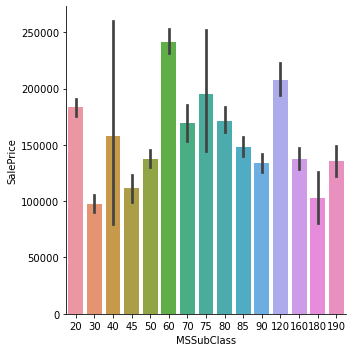

<Figure size 720x432 with 0 Axes>

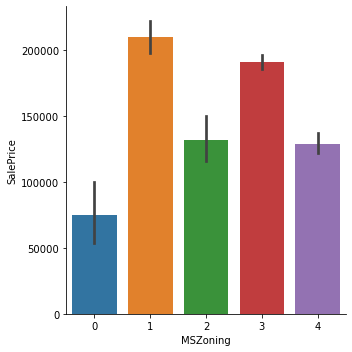

<Figure size 720x432 with 0 Axes>

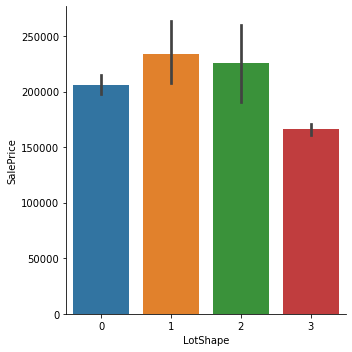

<Figure size 720x432 with 0 Axes>

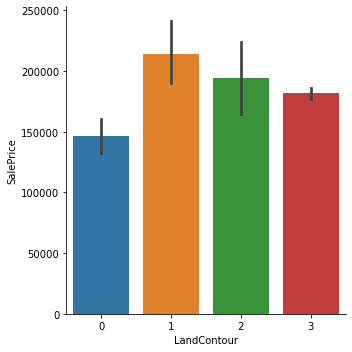

<Figure size 720x432 with 0 Axes>

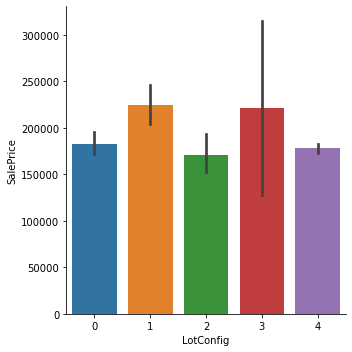

<Figure size 720x432 with 0 Axes>

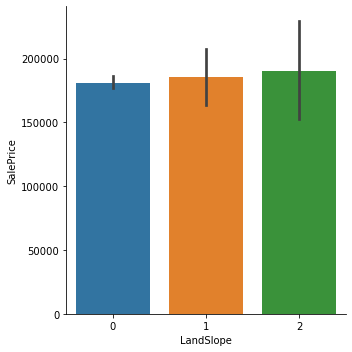

<Figure size 720x432 with 0 Axes>

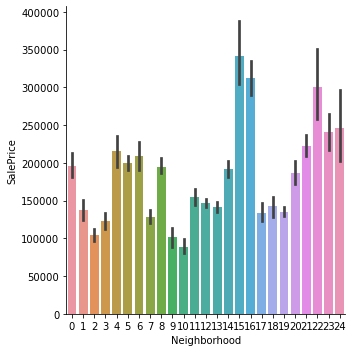

<Figure size 720x432 with 0 Axes>

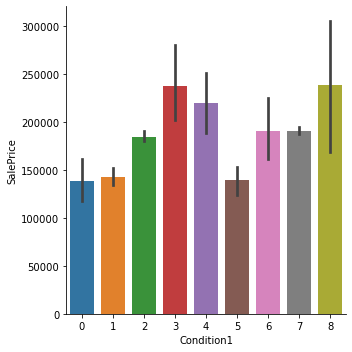

<Figure size 720x432 with 0 Axes>

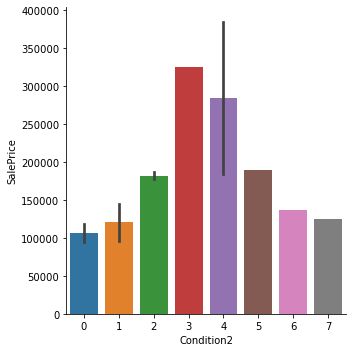

<Figure size 720x432 with 0 Axes>

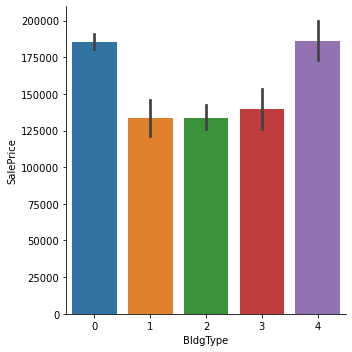

<Figure size 720x432 with 0 Axes>

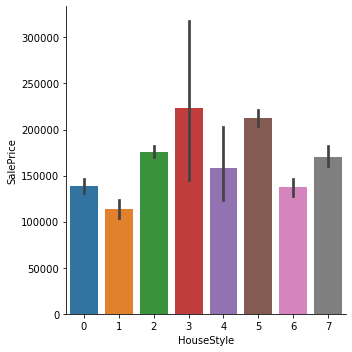

<Figure size 720x432 with 0 Axes>

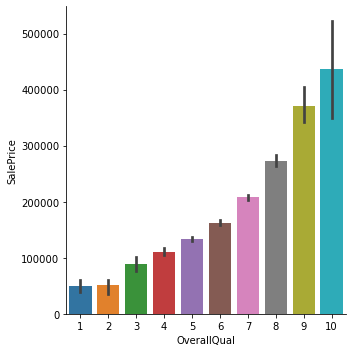

<Figure size 720x432 with 0 Axes>

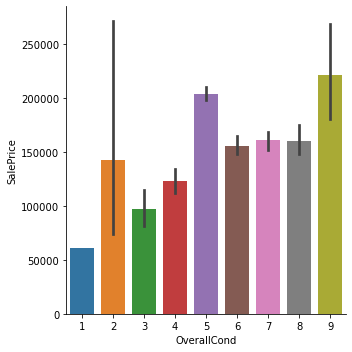

<Figure size 720x432 with 0 Axes>

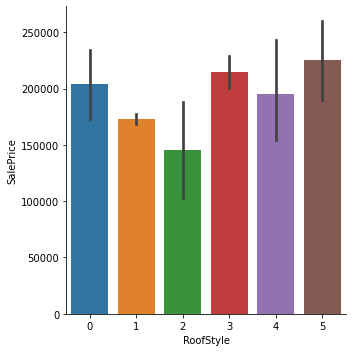

<Figure size 720x432 with 0 Axes>

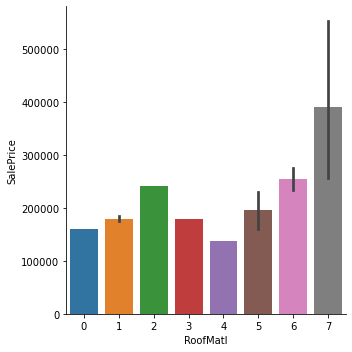

<Figure size 720x432 with 0 Axes>

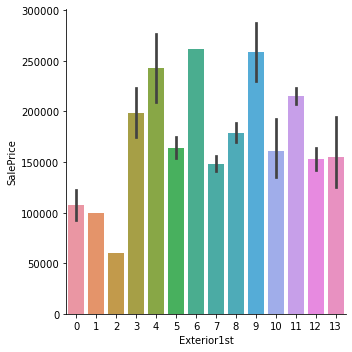

<Figure size 720x432 with 0 Axes>

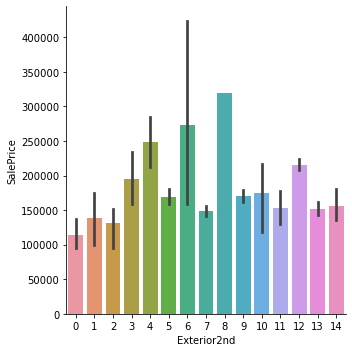

<Figure size 720x432 with 0 Axes>

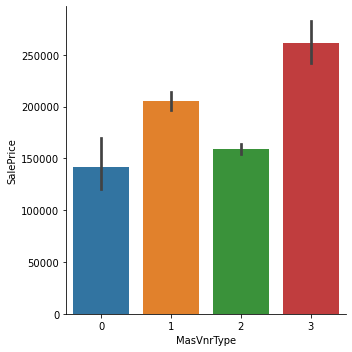

<Figure size 720x432 with 0 Axes>

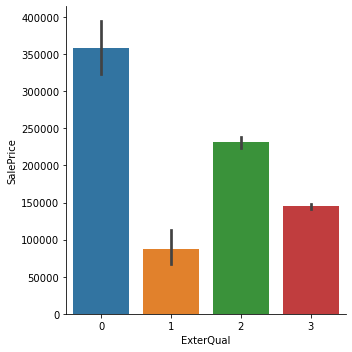

<Figure size 720x432 with 0 Axes>

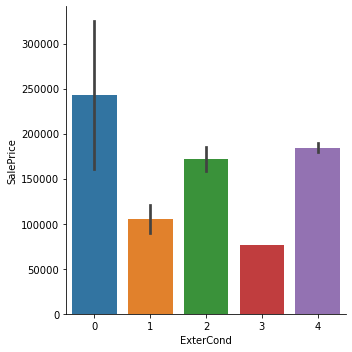

<Figure size 720x432 with 0 Axes>

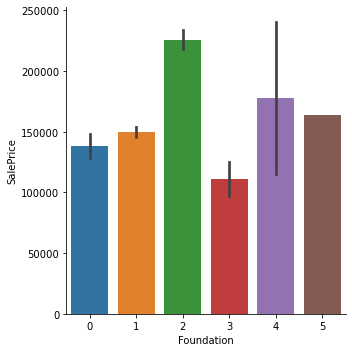

<Figure size 720x432 with 0 Axes>

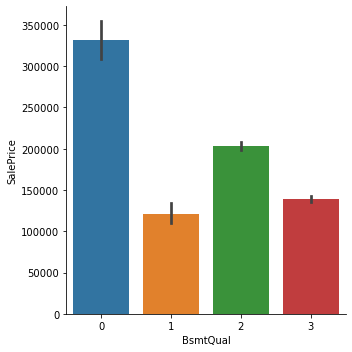

<Figure size 720x432 with 0 Axes>

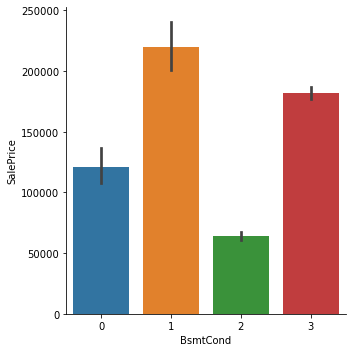

<Figure size 720x432 with 0 Axes>

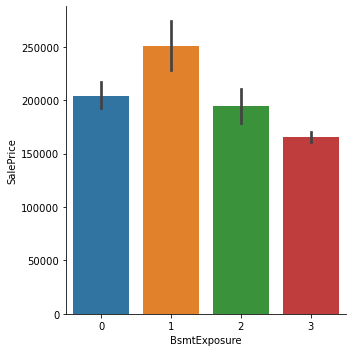

<Figure size 720x432 with 0 Axes>

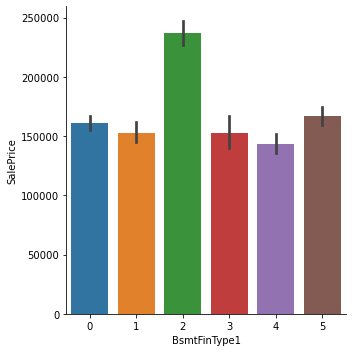

<Figure size 720x432 with 0 Axes>

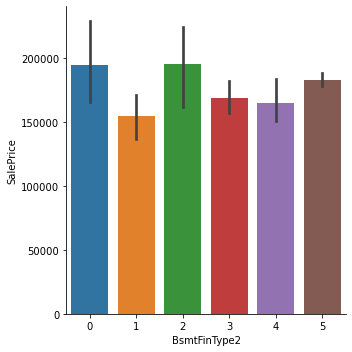

<Figure size 720x432 with 0 Axes>

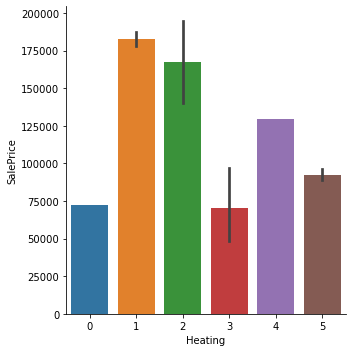

<Figure size 720x432 with 0 Axes>

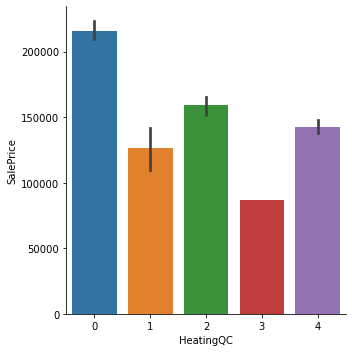

<Figure size 720x432 with 0 Axes>

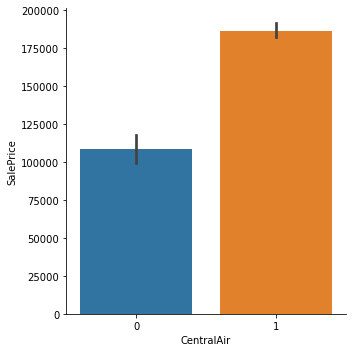

<Figure size 720x432 with 0 Axes>

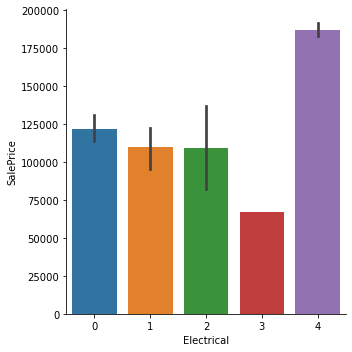

<Figure size 720x432 with 0 Axes>

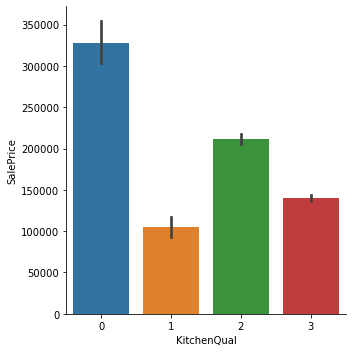

<Figure size 720x432 with 0 Axes>

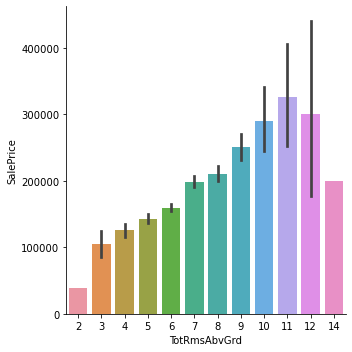

<Figure size 720x432 with 0 Axes>

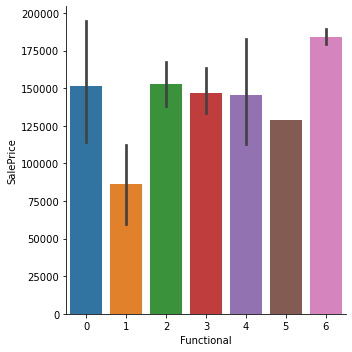

<Figure size 720x432 with 0 Axes>

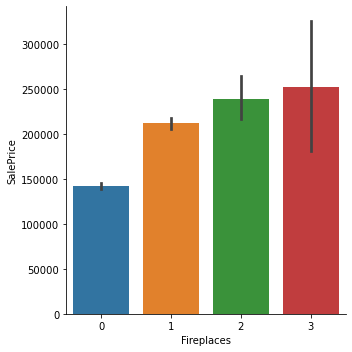

<Figure size 720x432 with 0 Axes>

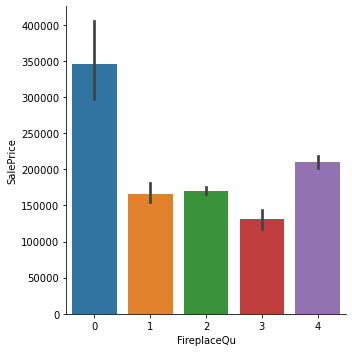

<Figure size 720x432 with 0 Axes>

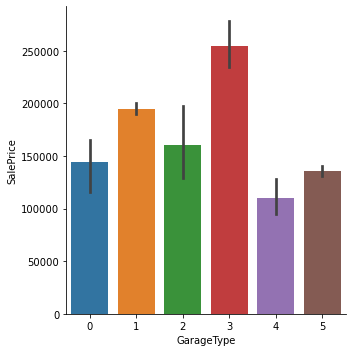

<Figure size 720x432 with 0 Axes>

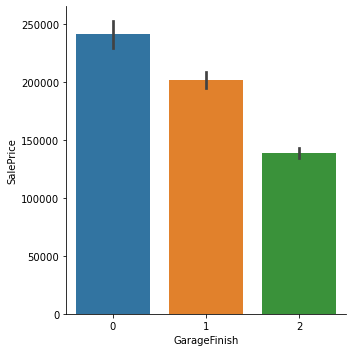

<Figure size 720x432 with 0 Axes>

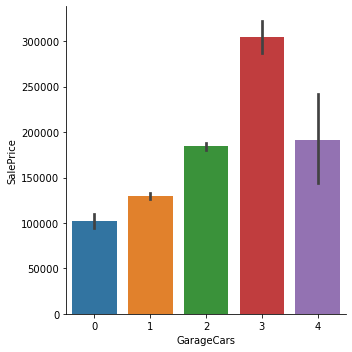

<Figure size 720x432 with 0 Axes>

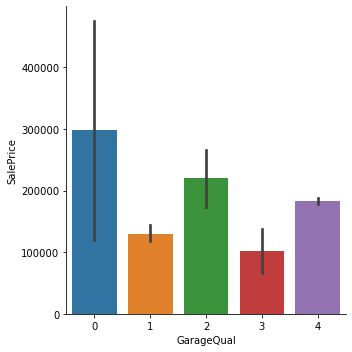

<Figure size 720x432 with 0 Axes>

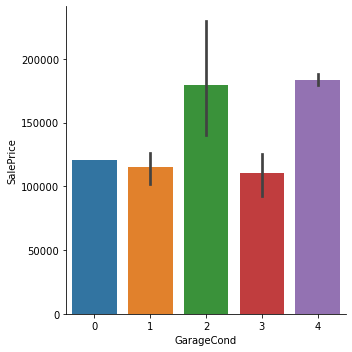

<Figure size 720x432 with 0 Axes>

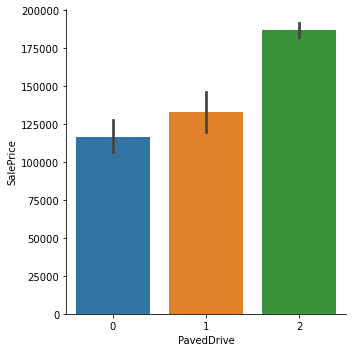

<Figure size 720x432 with 0 Axes>

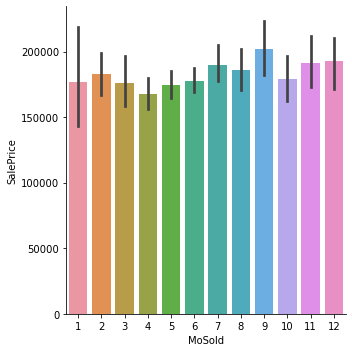

<Figure size 720x432 with 0 Axes>

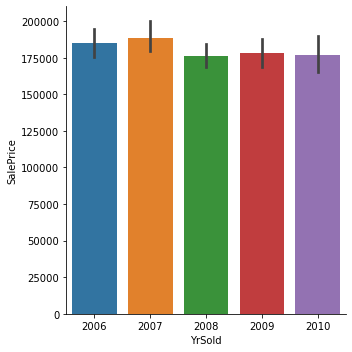

<Figure size 720x432 with 0 Axes>

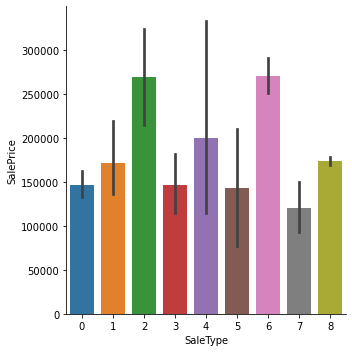

<Figure size 720x432 with 0 Axes>

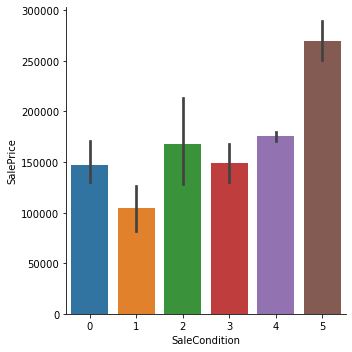

In [39]:
l=['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageCars',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
for i in l:
    plt.figure(figsize=(10,6))
    sns.catplot(y='SalePrice',x=i,data=df,kind="bar")
    plt.show()

Least SalePrice is for 30:1-STORY 1945 & OLDER and maximum for 60:2-STORY 1946 & NEWER

In MSZoing maximum is for category 1 i.e, Floating Village Residential

Lotshape 1 and 2 have almost similar price and 3 has least.

Landconotur corresponding to 1 i.e, HLS	Hillside - Significant slope from side to side has maximum price.

Lotconfig corresponding to 1 and 3 have similar price.

Neighborhoot with (15)NPkVill	Northpark Villa has maximum sales price and (10)IDOTRR	Iowa DOT and Rail Road has least.

Normal condition houses have highest saleprice

1Fam	Single-family Detached and TwnhsI	Townhouse Inside Unit have maximum saleprice.

In HouseStyle category 3: 2Story	Two story has max sale price.
    
In OverallQual: SalePrice increase as Ratings increase. 
  
Similary for OverallCond 5 and 9 have max sale price
    
In RoofStyle 5:Shed has maximum.    
       
In Exterior1st 6:HardBoard and 9:Other have Saleprice
        
In Exterior2nd 8:MetalSd	Metal Siding      
    
In MasVnrType, 3:stone has max saleprice and 0:BrkCmn	Brick Common has least
        
In ExterQual 0:Excellent has maximum price. Similary for ExterCond
   
In Foundation 2:PConc	Poured Contrete has max price
    
In BsmtQual 0: Ex	Excellent (100+ inches), In BsmtCond 1: Gd	Good, In BsmtExposure 1:
       Av	Average Exposure (split levels or foyers typically score average or above) have max sale prices
    
    
In BsmtFinType1: Rating of basement finished area - 2:GLQ	Good Living Quarters has max price
        
In HeatingQC: Heating quality and condition 0:Ex	Excellent has max price.
        
Houses with CentralAir has higher saleprice 

In FireplaceQu: Fireplace quality 0:Ex	Excellent - Exceptional Masonry Fireplace has max saleprice
        
GarageType 3:BuiltIn	Built-In (Garage part of house - typically has room above garage) has max saleprice
       
Finished Garage has more price

Paved Driveway has more price

In 2007 maximum houses are sold followed by 2006

In saletype category 2 and 6 have max sale price

Normal sale condition has max price.    

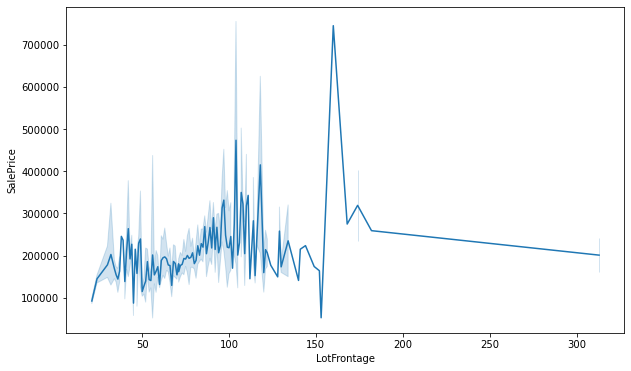

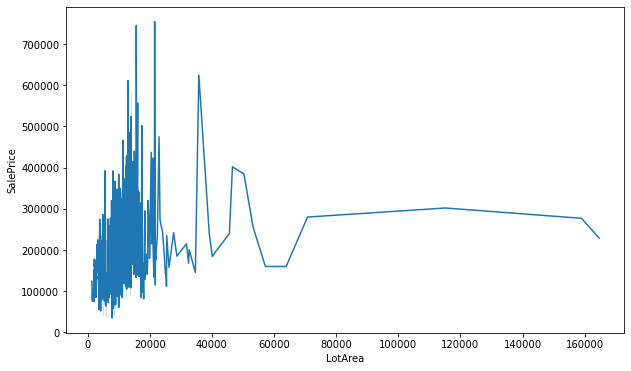

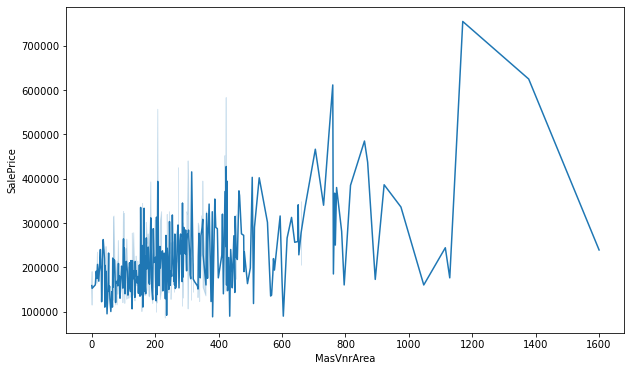

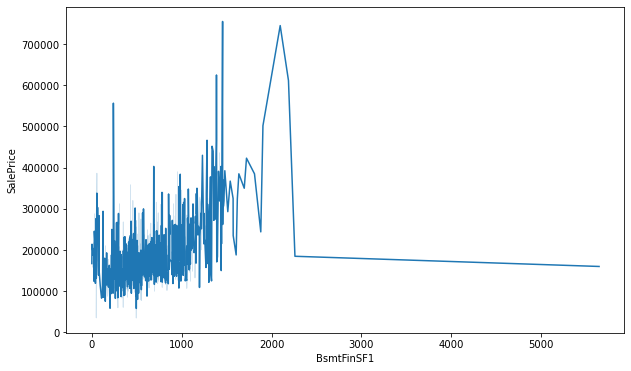

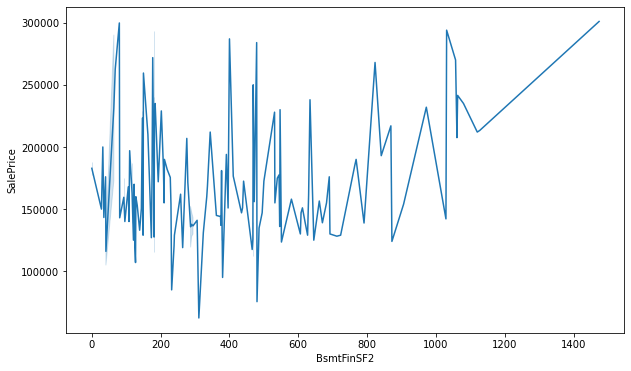

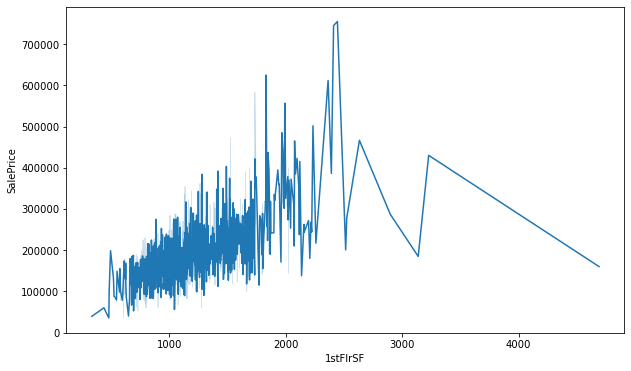

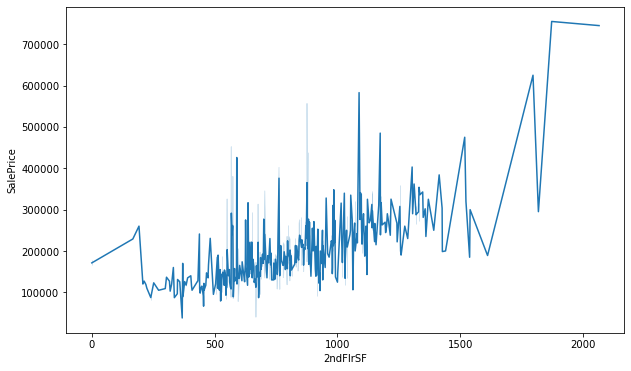

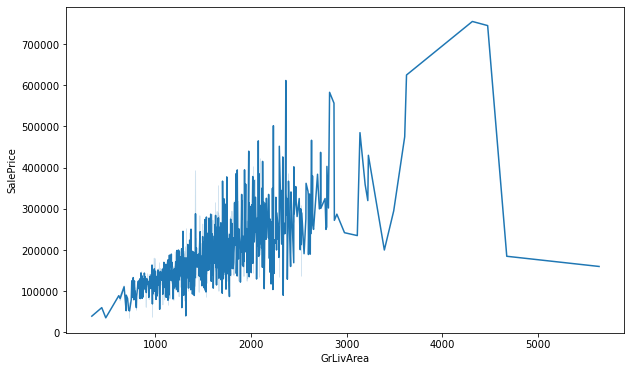

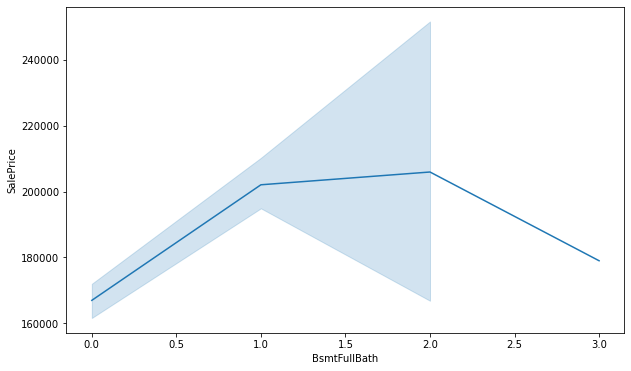

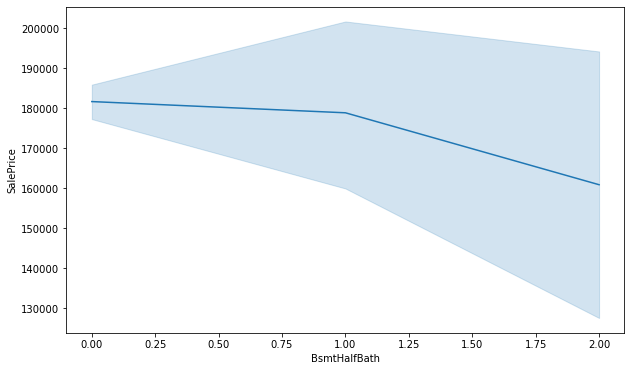

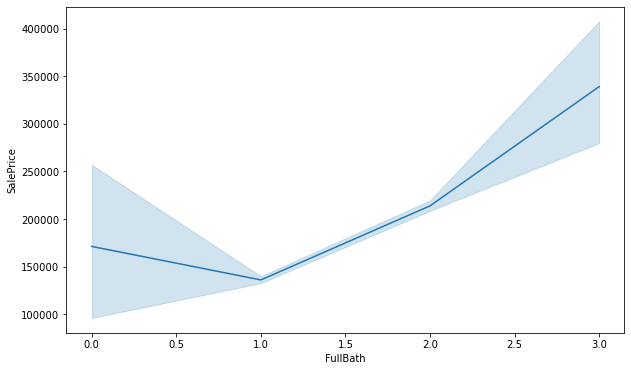

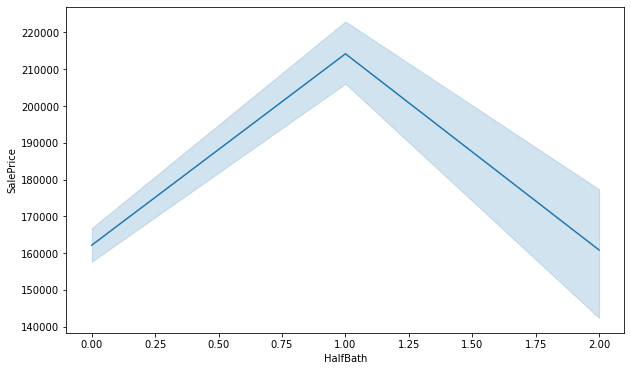

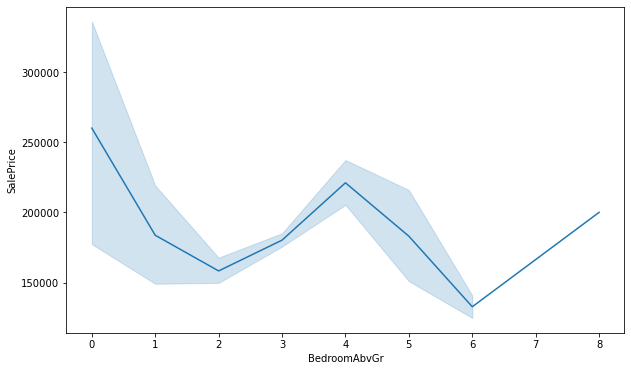

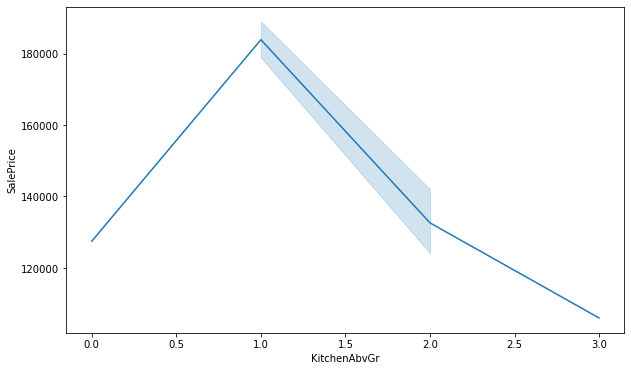

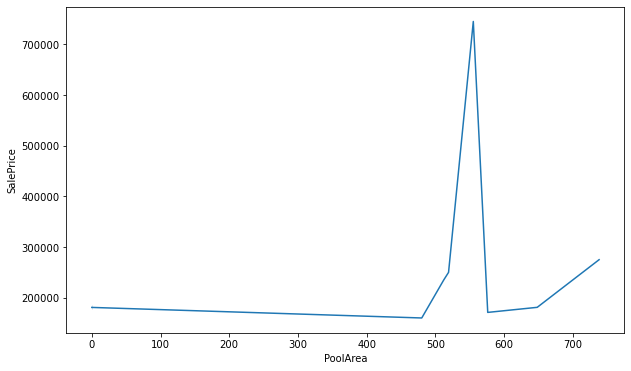

In [40]:
l1=['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','PoolArea']
for i in l1:
    plt.figure(figsize=(10,6))
    sns.lineplot(y='SalePrice',x=i,data=df)
    plt.show()

In LotArea, initially the price keep on increasing as LotArea increases but after 70000 it becomes constant till 160000 and then drops.

In MasVnrArea, at 1200 saleprice is maximum and then it drops drastically.

For 1stFlrSF:first floor square feet till 2500 the price is increasing uniformly but after that it decreases and drops after 3000

For 2ndFlrSF:Second floor square feet the price is increasing as the area increases.
        

# Checking distribution/skewness

In [41]:
collist=df.columns.values
nrows=5
ncol=15

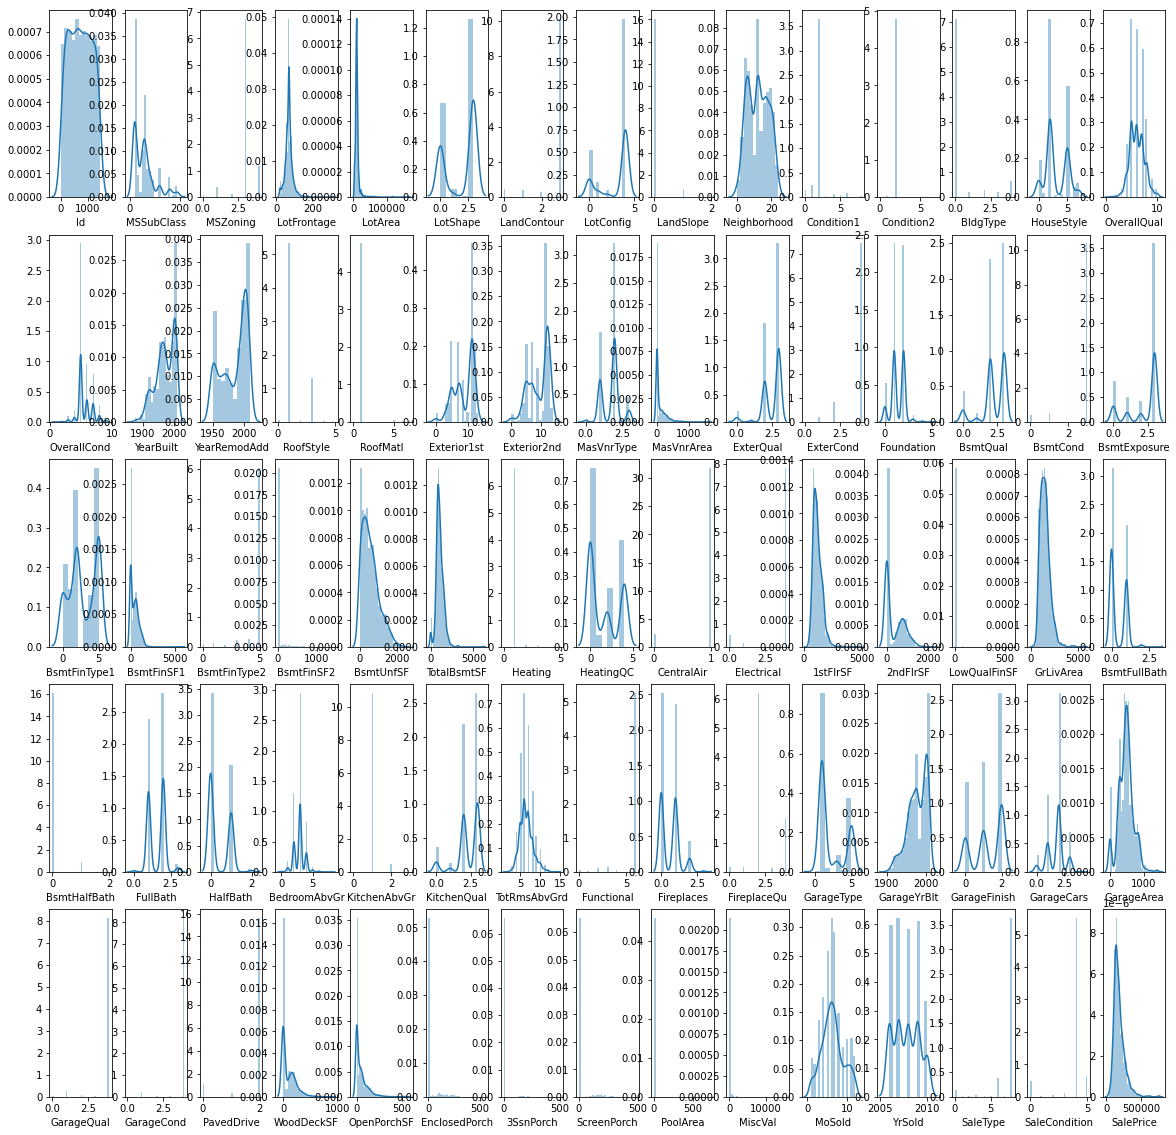

In [42]:
#using distplot to check distribution of each attribute
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

It can be observed that there is skewness present in : 'MSSubClass', 'OverallCond', 'YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','MasVnrType','ExterQual','BsmtQual','BsmtExposure','2ndFlrSF','KitchenQual','Fireplaces','GarageType','GarageYrBlt','WoodDeckSF'and 'OpenPorchSF'.

# Plotting the outliers using boxplot

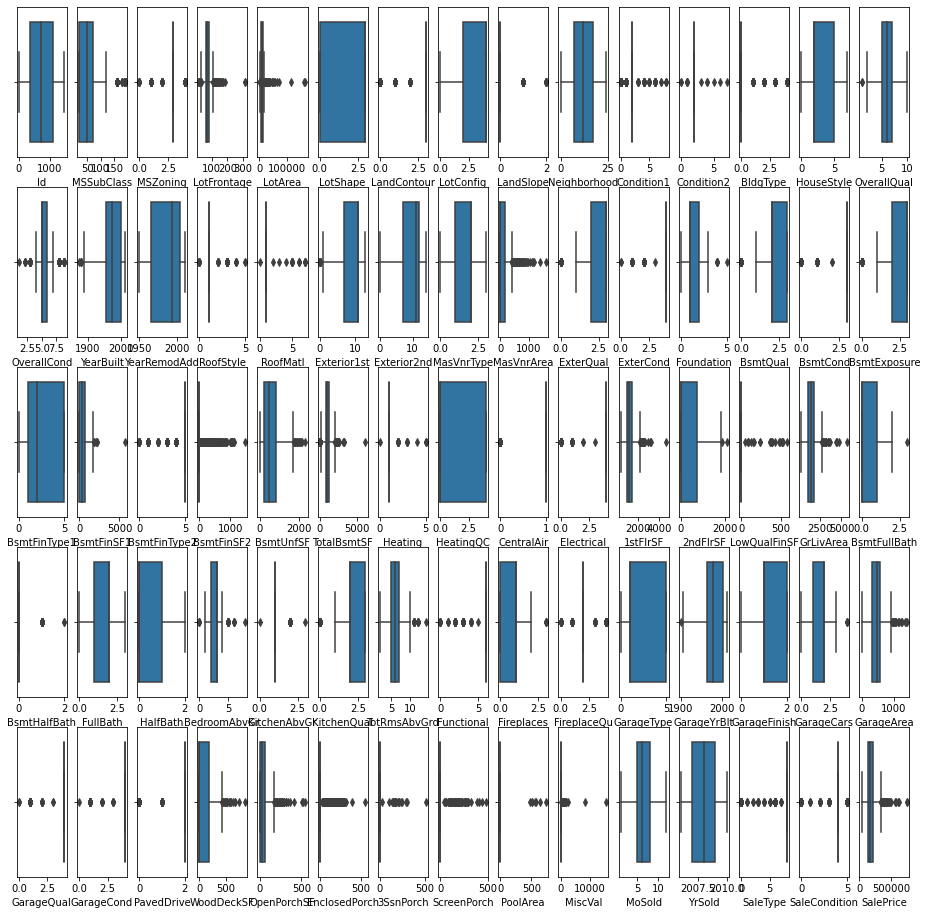

In [43]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]])

# Removing the Outliers using Z-score

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.43548658, 1.50830058, 0.02164599, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.39632483, 0.87704243, 0.02164599, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.16554544, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.26961389, 2.46243779, 0.02164599, ..., 0.33003329, 0.20793187,
        0.41705186],
       [1.66626597, 0.31562908, 4.76211672, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.25755011, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [45]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 19, 33, ..., 38, 61, 62], dtype=int64))


In [46]:
df_new=df[(z<3).all(axis=1)]
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,0,3,4,0,13,...,0,0,0,0,0,2,2007,8,4,128000
2,793,60,3,92.00000,9920,0,3,1,0,15,...,0,0,0,0,0,6,2007,8,4,269790
5,1197,60,3,58.00000,14054,0,3,4,0,8,...,0,0,0,0,0,11,2006,6,5,219210
6,561,20,3,70.98847,11341,0,3,4,0,19,...,0,0,95,0,0,5,2010,8,4,121500
11,833,60,3,44.00000,9548,0,3,1,0,5,...,0,0,0,0,0,1,2010,8,4,237000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,673,20,3,70.98847,11250,0,3,4,0,24,...,0,0,0,0,0,6,2006,8,4,165000
1161,1301,60,3,70.98847,10762,0,3,1,0,8,...,0,0,0,0,0,5,2009,8,4,225000
1163,289,20,3,70.98847,9819,0,3,4,0,19,...,0,0,0,0,0,2,2010,8,4,122000
1165,196,160,3,24.00000,2280,3,3,2,0,13,...,0,0,0,0,0,7,2009,8,4,148500


In [47]:
df.shape

(1168, 75)

In [48]:
df_new.shape

(483, 75)

In [49]:
#685 rows have been removed

In [50]:
df=df_new

In [51]:
#checking skewness
df.skew()

Id              -0.083896
MSSubClass       1.244303
MSZoning         2.328845
LotFrontage      0.046800
LotArea          0.194795
                   ...   
MoSold           0.270901
YrSold           0.075303
SaleType        -3.196449
SaleCondition    1.591452
SalePrice        0.800445
Length: 75, dtype: float64

# Test Data

In [52]:
#checking the null values
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [53]:
#checking the null values
df1.isnull().sum().sum()

1407

In [54]:
List1=['LotFrontage','GarageYrBlt','MasVnrArea']
imp=SimpleImputer(strategy='mean')
for i in List1:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))


In [55]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000000,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.000000,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.000000,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,66.425101,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.000000,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [56]:
#checking unique values for categorical columns and their value_counts

for column in df1.columns:
    if df1[column].dtype==object:
        print(str(column) + ':' + str(df1[column].unique()))
        print(df1[column].value_counts())
        count_nan_in_df1 = df1[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df1))
        print('**********************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'C (all)']
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
Count of NaN: 0
**********************************


Street:['Pave' 'Grvl']
Pave    290
Grvl      2
Name: Street, dtype: int64
Count of NaN: 0
**********************************


Alley:[nan 'Grvl' 'Pave']
Grvl    9
Pave    5
Name: Alley, dtype: int64
Count of NaN: 278
**********************************


LotShape:['IR1' 'Reg' 'IR3' 'IR2']
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
Count of NaN: 0
**********************************


LandContour:['HLS' 'Lvl' 'Bnk' 'Low']
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
Count of NaN: 0
**********************************


Utilities:['AllPub' 'NoSeWa']
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64
Count of NaN: 0
**********************************


LotConfig:['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
Inside     210
Corner      41
CulDSac     25
FR

In [57]:
df1.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)
df1


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000000,14157,Pave,IR1,HLS,AllPub,Corner,...,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,Reg,Lvl,AllPub,Inside,...,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,IR1,Lvl,AllPub,CulDSac,...,18,0,0,0,0,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.000000,10206,Pave,Reg,Lvl,AllPub,Inside,...,99,0,0,0,0,0,10,2008,WD,Normal
288,1048,20,RL,57.000000,9245,Pave,IR2,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,Normal
289,17,20,RL,66.425101,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,700,3,2010,WD,Normal
290,523,50,RM,50.000000,5000,Pave,Reg,Lvl,AllPub,Corner,...,24,36,0,0,0,0,10,2006,WD,Normal


In [58]:
List=['MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']
imp=SimpleImputer(strategy='most_frequent')
for i in List:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))


In [59]:
for column in df1.columns:
    if df1[column].dtype==object:
        print(str(column) + ':' + str(df1[column].unique()))
        print(df1[column].value_counts())
        count_nan_in_df1 = df1[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df1))
        print('**********************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'C (all)']
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
Count of NaN: 0
**********************************


Street:['Pave' 'Grvl']
Pave    290
Grvl      2
Name: Street, dtype: int64
Count of NaN: 0
**********************************


LotShape:['IR1' 'Reg' 'IR3' 'IR2']
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
Count of NaN: 0
**********************************


LandContour:['HLS' 'Lvl' 'Bnk' 'Low']
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
Count of NaN: 0
**********************************


Utilities:['AllPub' 'NoSeWa']
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64
Count of NaN: 0
**********************************


LotConfig:['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64
Count of NaN: 0
**********************************


LandSlope:['Gtl'

In [60]:
for column in df1.columns:
    if df1[column].dtype==object:
        df1[column]=le.fit_transform(df1[column].astype(str))

In [61]:
df1.drop(['Street','Utilities'],axis=1,inplace=True) 

# Model Training

In [62]:
#Splitting data into input and output variable
x=df.drop(['SalePrice'],axis=1)
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,70.98847,4928,0,3,4,0,13,...,205,0,0,0,0,0,2,2007,8,4
2,793,60,3,92.00000,9920,0,3,1,0,15,...,130,0,0,0,0,0,6,2007,8,4
5,1197,60,3,58.00000,14054,0,3,4,0,8,...,17,0,0,0,0,0,11,2006,6,5
6,561,20,3,70.98847,11341,0,3,4,0,19,...,0,0,0,95,0,0,5,2010,8,4
11,833,60,3,44.00000,9548,0,3,1,0,5,...,39,0,0,0,0,0,1,2010,8,4


In [63]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [64]:
x=pd.DataFrame(x)

In [65]:
x.columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [66]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.477706,1.660033,-0.309893,0.027929,-1.280653,-1.22707,0.199649,0.611508,0.0,0.242403,...,3.167091,-0.274366,0.0,-0.222668,0.0,-0.137381,-1.641496,-0.640663,0.344345,-0.276579
1,0.101289,0.149585,-0.309893,1.141567,0.202940,-1.22707,0.199649,-1.219226,0.0,0.567176,...,1.710618,-0.274366,0.0,-0.222668,0.0,-0.137381,-0.103489,-0.640663,0.344345,-0.276579
2,1.059118,0.149585,-0.309893,-0.660477,1.431540,-1.22707,0.199649,0.611508,0.0,-0.569529,...,-0.483803,-0.274366,0.0,-0.222668,0.0,-0.137381,1.819020,-1.375676,-2.254383,2.692035
3,-0.448751,-0.857380,-0.309893,0.027929,0.625253,-1.22707,0.199649,0.611508,0.0,1.216721,...,-0.813936,-0.274366,0.0,2.786792,0.0,-0.137381,-0.487991,1.564375,0.344345,-0.276579
4,0.196124,0.149585,-0.309893,-1.402495,0.092384,-1.22707,0.199649,-1.219226,0.0,-1.056688,...,-0.056570,-0.274366,0.0,-0.222668,0.0,-0.137381,-2.025998,1.564375,0.344345,-0.276579


In [67]:
#target column
y=df['SalePrice'].values
y

array([128000, 269790, 219210, 121500, 237000, 201000, 120500, 194500,
       106000, 133000, 146000, 135000, 169000, 122000, 152000, 243000,
       132000, 149900, 124500, 312500, 153000, 230000, 190000, 239000,
       107500, 123000, 176000, 350000, 130000, 148000, 173000, 225000,
       297000, 215000, 204900, 109500, 163990, 189950, 144000, 251000,
       129000, 223500, 115000, 209500, 190000, 176432, 141000, 187500,
       170000, 123000, 185000, 143000, 239900, 313000, 123000, 222500,
       106500, 255900, 155000, 163500, 190000, 109500, 214000, 119000,
       132500, 141000, 178000, 139950, 167000, 125000, 130000, 140000,
       169000, 125500, 154000, 141000, 165500, 246578, 185750, 237500,
       235000, 145000, 197900, 173000, 281213, 221500, 137000, 315500,
       180000, 103200, 138000,  89500, 240000, 120000, 135000, 157000,
       116900, 143750, 192000, 224500, 260400, 215000, 139000, 181134,
       156932, 128900, 290000, 134900, 175500, 185500, 325300, 325000,
      

In [68]:
#Checking the shape of input and output variable
x.shape

(483, 74)

In [69]:
y.shape

(483,)

In [70]:
y=y.reshape(-1,1)
y.shape

(483, 1)

In [71]:
y

array([[128000],
       [269790],
       [219210],
       [121500],
       [237000],
       [201000],
       [120500],
       [194500],
       [106000],
       [133000],
       [146000],
       [135000],
       [169000],
       [122000],
       [152000],
       [243000],
       [132000],
       [149900],
       [124500],
       [312500],
       [153000],
       [230000],
       [190000],
       [239000],
       [107500],
       [123000],
       [176000],
       [350000],
       [130000],
       [148000],
       [173000],
       [225000],
       [297000],
       [215000],
       [204900],
       [109500],
       [163990],
       [189950],
       [144000],
       [251000],
       [129000],
       [223500],
       [115000],
       [209500],
       [190000],
       [176432],
       [141000],
       [187500],
       [170000],
       [123000],
       [185000],
       [143000],
       [239900],
       [313000],
       [123000],
       [222500],
       [106500],
       [255900],
       [155000

In [72]:
#Importing all the libraries,metrices required for ML 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [73]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [74]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(386, 74) (97, 74)


In [75]:
print(y_train.shape,y_test.shape)

(386, 1) (97, 1)


In [76]:
#All algorithms using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 0.918765260422787
Mean Absolute Error: 13468.217579086982
Mean Squared Error: 290600829.650564
RMSE: 17047.018204089654
r2_score: 0.9014342310851312
****************************************


Score of Lasso() is: 0.9187586954908141
Mean Absolute Error: 13456.832776490697
Mean Squared Error: 290135724.36956656
RMSE: 17033.370904479434
r2_score: 0.9015919851414531
****************************************


Score of Ridge() is: 0.9187458663946173
Mean Absolute Error: 13425.1446070986
Mean Squared Error: 288037373.5352045
RMSE: 16971.663841097154
r2_score: 0.9023037021853816
****************************************


Score of ElasticNet() is: 0.8987344171502396
Mean Absolute Error: 13878.544217048115
Mean Squared Error: 296213222.44369215
RMSE: 17210.846069955194
r2_score: 0.8995306239558187
****************************************


Score of SVR() is: -0.01761607150371236
Mean Absolute Error: 43258.26678009366
Mean Squared Error: 3026055714.6322412
RMSE: 55

I am choosing GradientBoostingRegressor as our best model since it's giving us best score and it's performing well.It's r2_score is also satisfactory and it shows that our model is neither underfitting/overfitting.

We are performing hyperparamter tuning using GridSearchCV on GradientBoostingRegressor as follows:

In [77]:
#Using GridSearchCV for hyper parameter tuning of GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

We have got 'learning_rate': 0.1, 'n_estimators': 300 as best parameters

In [78]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=300)
gbr.fit(x_train,y_train)
Sc=gbr.score(x_train,y_train)
predm=gbr.predict(x_test)
print('Score of',gbr,'is:',Sc)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of GradientBoostingRegressor(n_estimators=300) is: 0.9976896375406933
Mean Absolute Error: 11888.522479342035
Mean Squared Error: 256234681.95026788
RMSE: 16007.332130941368
r2_score: 0.9130905149876747


We are getting score : 0.9976896375406933 after performing hyperparameter tuning and earlier it was 0.9846658425719441

Its r2_score is also satisfactory.

Hence we will be saving GradientBoostingRegressor as our final model using joblib.

In [79]:
#Splitting data into input and output variable
x_new=df1
x_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.000000,14157,0,1,0,0,21,...,51,0,0,0,0,0,7,2007,5,2
1,1018,120,2,66.425101,5814,0,3,1,0,21,...,0,0,0,0,0,0,8,2009,0,0
2,929,20,2,66.425101,11838,3,3,4,0,4,...,151,0,0,0,0,0,6,2009,5,2
3,1148,70,2,75.000000,12000,3,0,4,0,5,...,0,0,0,0,0,0,7,2009,5,2
4,1227,60,2,86.000000,14598,0,3,1,0,20,...,18,0,0,0,0,0,1,2008,5,2


In [80]:
#predict the value
pred=gbr.predict(x_new)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [364646.96780801 358320.36625694 321852.31975566 370368.76404021
 349726.05541593 374855.57947727 408183.69736598 363610.95536972
 407230.56605333 360221.27474015 312948.98817332 360568.37154996
 314875.27243496 364258.23080666 322153.96150214 375034.12856778
 341560.04580951 355768.71809917 380324.31899652 384541.23365212
 369349.82605296 315704.30768647 353897.04640605 344227.00008743
 353705.93643779 357166.26225016 341953.66482782 354016.81399392
 373536.64172971 314608.07220397 378257.19730527 359283.36059133
 354538.88476664 357042.48211153 310560.20460053 339501.55282304
 378101.1294543  370602.94352321 376796.92837618 374317.05802802
 350468.74696503 382128.76234689 342219.06371578 359532.39603992
 351298.76526822 371272.20082105 346418.56197268 314595.65055771
 363407.83788557 370519.1471751  375213.44737016 409688.05828918
 335770.7407974  309591.87841795 342987.52914542 403561.54920842
 336657.84916455 342233.95595528 404205.51112256 322936.04188403
 

In [81]:
#Saving the best model
import joblib
joblib.dump(gbr,'Housing_Dataset.obj')

['Housing_Dataset.obj']